In [243]:
# Used for interacting with the operating system, such as handling file paths.
import os 

# A powerful library for numerical and matrix operations, commonly used in scientific computing and data analysis.
import numpy as np  

# Enables the creation of data visualizations and plots for better data understanding.
import matplotlib.pyplot as plt  

# Provides additional plotting functionalities and a more aesthetically pleasing style, built on top of matplotlib.
import seaborn as sns  

# Offers a fast and extensible progress bar for tracking the progress of loops and iterable objects.
from tqdm import trange  

# breaks text into individual words or sentences.
from nltk import tokenize  

# this module provides a list of common stop words used for text analysis and processing.
from nltk.corpus import stopwords  

# converting words to their base or root form.
from nltk.stem import WordNetLemmatizer  

# used for calculating the frequency distribution of words in a text.
from nltk.probability import FreqDist  

# A built-in Python module used for counting elements in an iterable.
from collections import Counter 

 # A module from scikit-learn used for text vectorization, converting text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer 

# A popular library for data manipulation and analysis, particularly useful for working with structured data like spreadsheets or tables.
import pandas as pd  


import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph 65018")

#to use Arabic date time
import locale
from datetime import datetime
import calendar

import re

In [15]:
files=os.listdir()

In [16]:
files=files[2:-1]

In [17]:
files

['stories_art-et-culture.csv',
 'stories_economie.csv',
 'stories_faits-divers.csv',
 'stories_marocains-du-monde.csv',
 'stories_medias.csv',
 'stories_orbites.csv',
 'stories_politique.csv',
 'stories_regions.csv',
 'stories_societe.csv',
 'stories_sport.csv',
 'stories_tamazight.csv']

In [300]:
ndf=pd.DataFrame()
for i in files:
    tdf=pd.read_csv(i)
    ndf=pd.concat([ndf,tdf],ignore_index=False)

In [160]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [162]:
#for each class we got 11000 eaxmple
#No missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 687.5+ KB


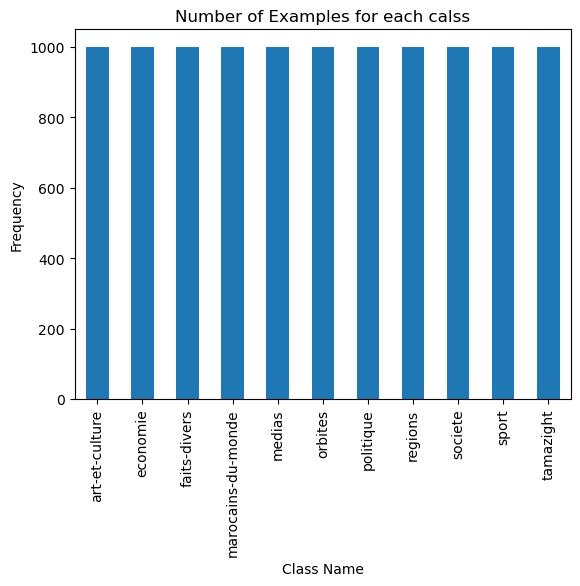

In [171]:
df['topic'].value_counts().plot(kind='bar')
plt.title('Number of Examples for each calss')
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.show()

In [ ]:
locale.setlocale(locale.LC_TIME, 'ar_SA.UTF-8')

In [65]:
'الجمعة 02 أكتوبر 2020 - 23:19'

In [122]:
from datetime import datetime

def arabic_datetime_to_datetime(arabic_datetime_str):
    try:
        # Custom dictionary to map Arabic month names to numerical values
        arabic_month_names = {
            'يناير': 1, 'فبراير': 2, 'مارس': 3, 'أبريل': 4,
            'مايو': 5, 'يونيو': 6, 'يوليو': 7, 'أغسطس': 8,
            'سبتمبر': 9, 'أكتوبر': 10, 'نوفمبر': 11, 'ديسمبر': 12
        }

        # Split the Arabic datetime string into its components (day, month, year, and time)
        arabic_date_time = arabic_datetime_str.split()
        day = arabic_date_time[1]
        month = arabic_date_time[2]
        year = arabic_date_time[3]
        time = arabic_date_time[5]

        # Convert Arabic month to numerical value using the custom mapping
        month_num = arabic_month_names[month]

        # Create the datetime object
        dt = datetime(int(year), month_num, int(day), int(time[:2]), int(time[-2:]))
        return dt
    except:
        print(arabic_datetime_str)
        

 # Output: 2020-10-02 23:19:00


In [113]:
arabic_datetime_to_datetime(df['date'].values[0])

datetime.datetime(2020, 10, 2, 23, 19)

الأربعاء 30 شتنبر 2020 - 19:15
الأربعاء 30 شتنبر 2020 - 18:28
الأربعاء 30 شتنبر 2020 - 10:02
الأربعاء 30 شتنبر 2020 - 09:05
الأربعاء 30 شتنبر 2020 - 07:00
الأربعاء 30 شتنبر 2020 - 04:05
الأربعاء 30 شتنبر 2020 - 03:00
الثلاثاء 29 شتنبر 2020 - 21:40
الثلاثاء 29 شتنبر 2020 - 16:05
الاثنين 28 شتنبر 2020 - 20:05
الاثنين 28 شتنبر 2020 - 16:30
الاثنين 28 شتنبر 2020 - 11:49
الاثنين 28 شتنبر 2020 - 11:00
الاثنين 28 شتنبر 2020 - 05:37
الاثنين 28 شتنبر 2020 - 04:09
الاثنين 28 شتنبر 2020 - 02:49
الأحد 27 شتنبر 2020 - 15:00
الأحد 27 شتنبر 2020 - 10:39
الأحد 27 شتنبر 2020 - 08:33
الأحد 27 شتنبر 2020 - 05:00
السبت 26 شتنبر 2020 - 12:44
السبت 26 شتنبر 2020 - 02:15
الجمعة 25 شتنبر 2020 - 05:00
الجمعة 25 شتنبر 2020 - 01:21
الخميس 24 شتنبر 2020 - 20:30
الأربعاء 23 شتنبر 2020 - 20:20
الأربعاء 23 شتنبر 2020 - 01:26
الاثنين 21 شتنبر 2020 - 13:46
الاثنين 21 شتنبر 2020 - 09:50
الاثنين 21 شتنبر 2020 - 08:15
الأحد 20 شتنبر 2020 - 07:55
الأحد 20 شتنبر 2020 - 06:00
السبت 19 شتنبر 2020 - 15:00
السبت 19 شتنبر 2020 

In [127]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  11000 non-null  int64         
 1   id          11000 non-null  object        
 2   title       11000 non-null  object        
 3   date        4000 non-null   datetime64[ns]
 4   author      11000 non-null  object        
 5   story       11000 non-null  object        
 6   topic       11000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 687.5+ KB


0     2020-10-02 23:19:00
1     2020-10-02 07:26:00
2     2020-10-02 04:00:00
3     2020-10-02 02:00:00
4     2020-10-01 19:40:00
              ...        
995                   NaT
996                   NaT
997                   NaT
998                   NaT
999                   NaT
Name: date, Length: 11000, dtype: datetime64[ns]

In [131]:
t=list(df['topic'].unique())

In [134]:
topics=dict(zip(t,range(0,11)))

In [135]:
topics

{'art-et-culture': 0,
 'economie': 1,
 'faits-divers': 2,
 'marocains-du-monde': 3,
 'medias': 4,
 'orbites': 5,
 'politique': 6,
 'regions': 7,
 'societe': 8,
 'sport': 9,
 'tamazight': 10}

In [136]:
def enumerateTopics(name):
    return topics[name]

In [164]:
df['topic']=df['topic'].apply(enumerateTopics)

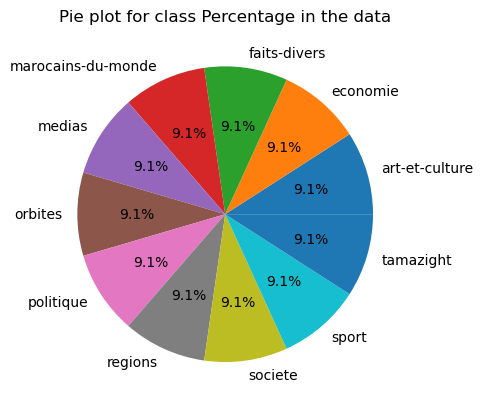

In [169]:
plt.pie(df['topic'].value_counts(),labels=t,autopct='%1.1f%%')
plt.title("Pie plot for class Percentage in the data")
plt.show()

In [201]:
def clean(text):
    text=text.lower()
    text= " ".join([word for word in text if word  not in stopwords.words('arabic')])
    return text

In [203]:
df['story'].values[0]

'وجه "بيت الشعر في المغرب" إلى وزير الثقافة والشباب والرياضة رسالة موسومة بـ"لماذا تحولت أحلام بيضاء إلى كوابيس سوداء؟"، أشار من خلالها إلى أن "بيت الشعر تأسّس سنة 1996 بهدف تحقيق جُملة من الأهداف التي تروم جميعُها تعزيز مكانة الشّعر في المجتمع والحياة وترسيخ مكانته بين الناس كحاملٍ لقيم الحلم والخيال؛ فمن تلك الأهداف توطين الشعر المغربي في المقررات الدراسية وتشجيع التلاميذ والطلبة على قراءته وتذوّق جمالياته، خاصّة في اللحظة التي ينتصرُ فيها لكل ما هو مدهش وإنساني".وجاء في الرسالة، التي توصلت هسبريس بنسخة منها، أن "بيت الشعر نجح في المغرب خلال مسيرته الطويلة التي تمتدّ على مدى ربع قرن في إقناع المنظمة العالمية للتربية والثقافة والعلوم (اليونيسكو) بإحداث يوم عالمي للشعر عن طريق المقترح الذي تقدّم به، والذي تبنته الحكومة المغربية في عهد الراحل عبد الرحمان اليوسفي، كما نجح في ضمان مكانة عالمية لجائزته الشعرية المعروفة "الأركانة" التي صار شعراء العالم يتطلعون للفوز بها، علاوة على انتظام منشوراته الشعرية ومجلته الرصينة "البيت"، واستدامة برامجه الشعرية بالتعاون مع عدد من الشركاء الذين آمنوا 

In [225]:
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df[df['topic']=='societe']['story'])

In [224]:
bigrams

AttributeError: 'CountVectorizer' object has no attribute 'toarray'

In [247]:
count_values=bigrams.toarray().sum(axis=0)
ngram_freq=pd.DataFrame(sorted([(count_values[i],k)for k,i in cv.vocabulary_.items()],reverse=True))
ngram_freq.columns=["frequency","ngram"]

In [248]:
ngram_freq

,frequency,ngram
0,566,إلى أن
1,471,وزارة الصحة
2,467,من أجل
3,440,في المائة
4,428,كوفيد 19
...,...,...
203929,1,000 برسم
203930,1,00 يمنع
203931,1,00 وعرضه
203932,1,00 بمثابة


In [273]:
plt.rcParams['font.family'] = 'DejaVu Sans'
df['story']= df['story'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Sample data (replace this with your actual data)

# Create a pandas DataFrame from the sample data

# Set the font to support Arabic characters (replace with an appropriate font file)


In [286]:
def visualizeBigram(x):
    print()
    cv=CountVectorizer(ngram_range=(2,2))
    bigrams=cv.fit_transform(df[df['topic']==x]['story'])
    count_values=bigrams.toarray().sum(axis=0)
    ngram_freq=pd.DataFrame(sorted([(count_values[i],k)for k,i in cv.vocabulary_.items()],reverse=True))
    ngram_freq.columns=["frequency","ngram"]
    # Reshape the Arabic text for correct display (using arabic_reshaper and bidi)
    sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['ngram'][:10])
    plt.title(f'Bigram of {x}')
    
    

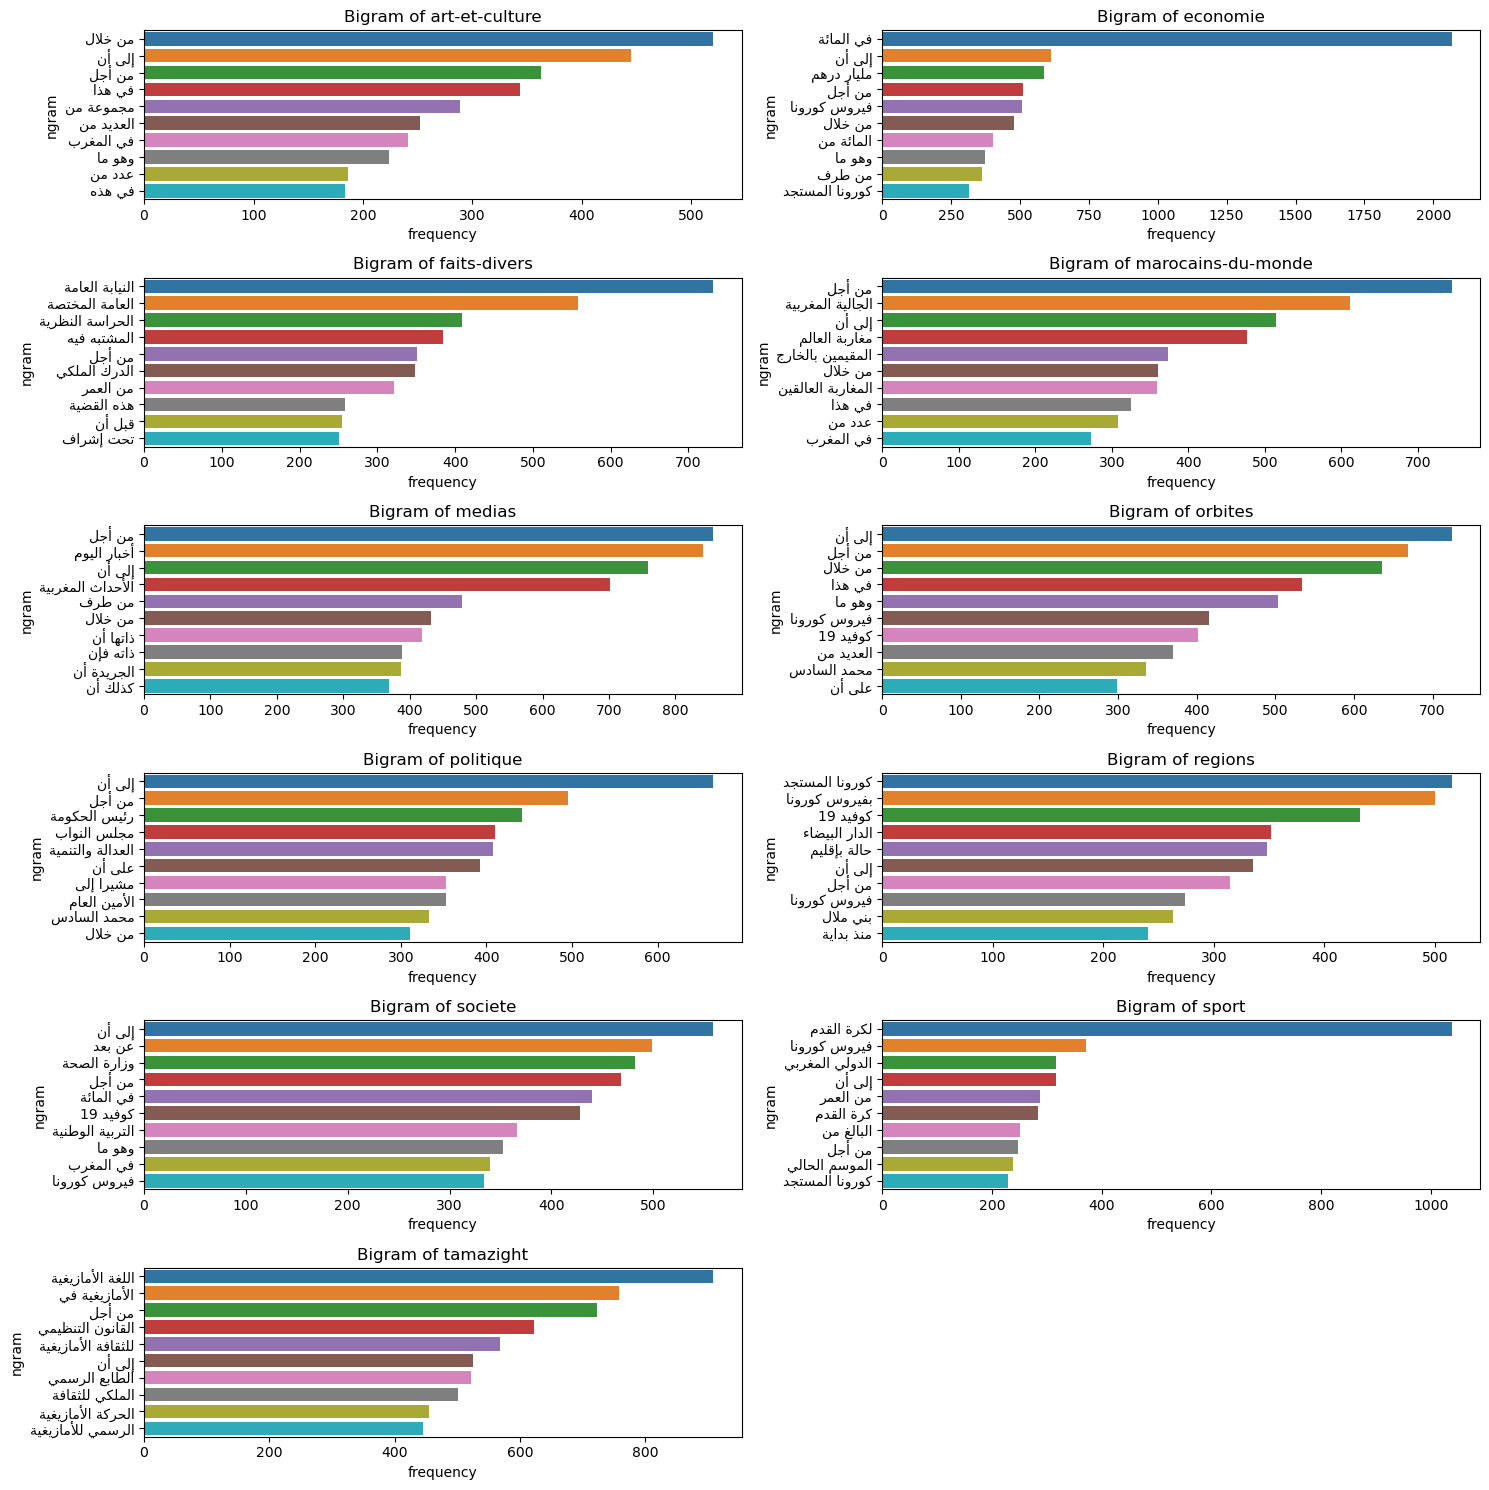

In [291]:
num_rows = 6
num_cols = 2

# Create the plot
plt.figure(figsize=(15, 15))
for (i,x) in enumerate(t):
    plt.subplot(num_rows, num_cols, i + 1)
    visualizeBigram(x)
plt.tight_layout()
plt.show()

In [269]:
df[df['topic']==t[0]]

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
995,995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
996,996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
997,997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
998,998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture


In [296]:
def visualizeTrigram(x):
    print()
    cv=CountVectorizer(ngram_range=(3,3))
    bigrams=cv.fit_transform(df[df['topic']==x]['story'])
    count_values=bigrams.toarray().sum(axis=0)
    ngram_freq=pd.DataFrame(sorted([(count_values[i],k)for k,i in cv.vocabulary_.items()],reverse=True))
    ngram_freq.columns=["frequency","ngram"]
    # Reshape the Arabic text for correct display (using arabic_reshaper and bidi)
    sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['ngram'][:10])
    plt.title(f'Trigram of {x}')
    
    

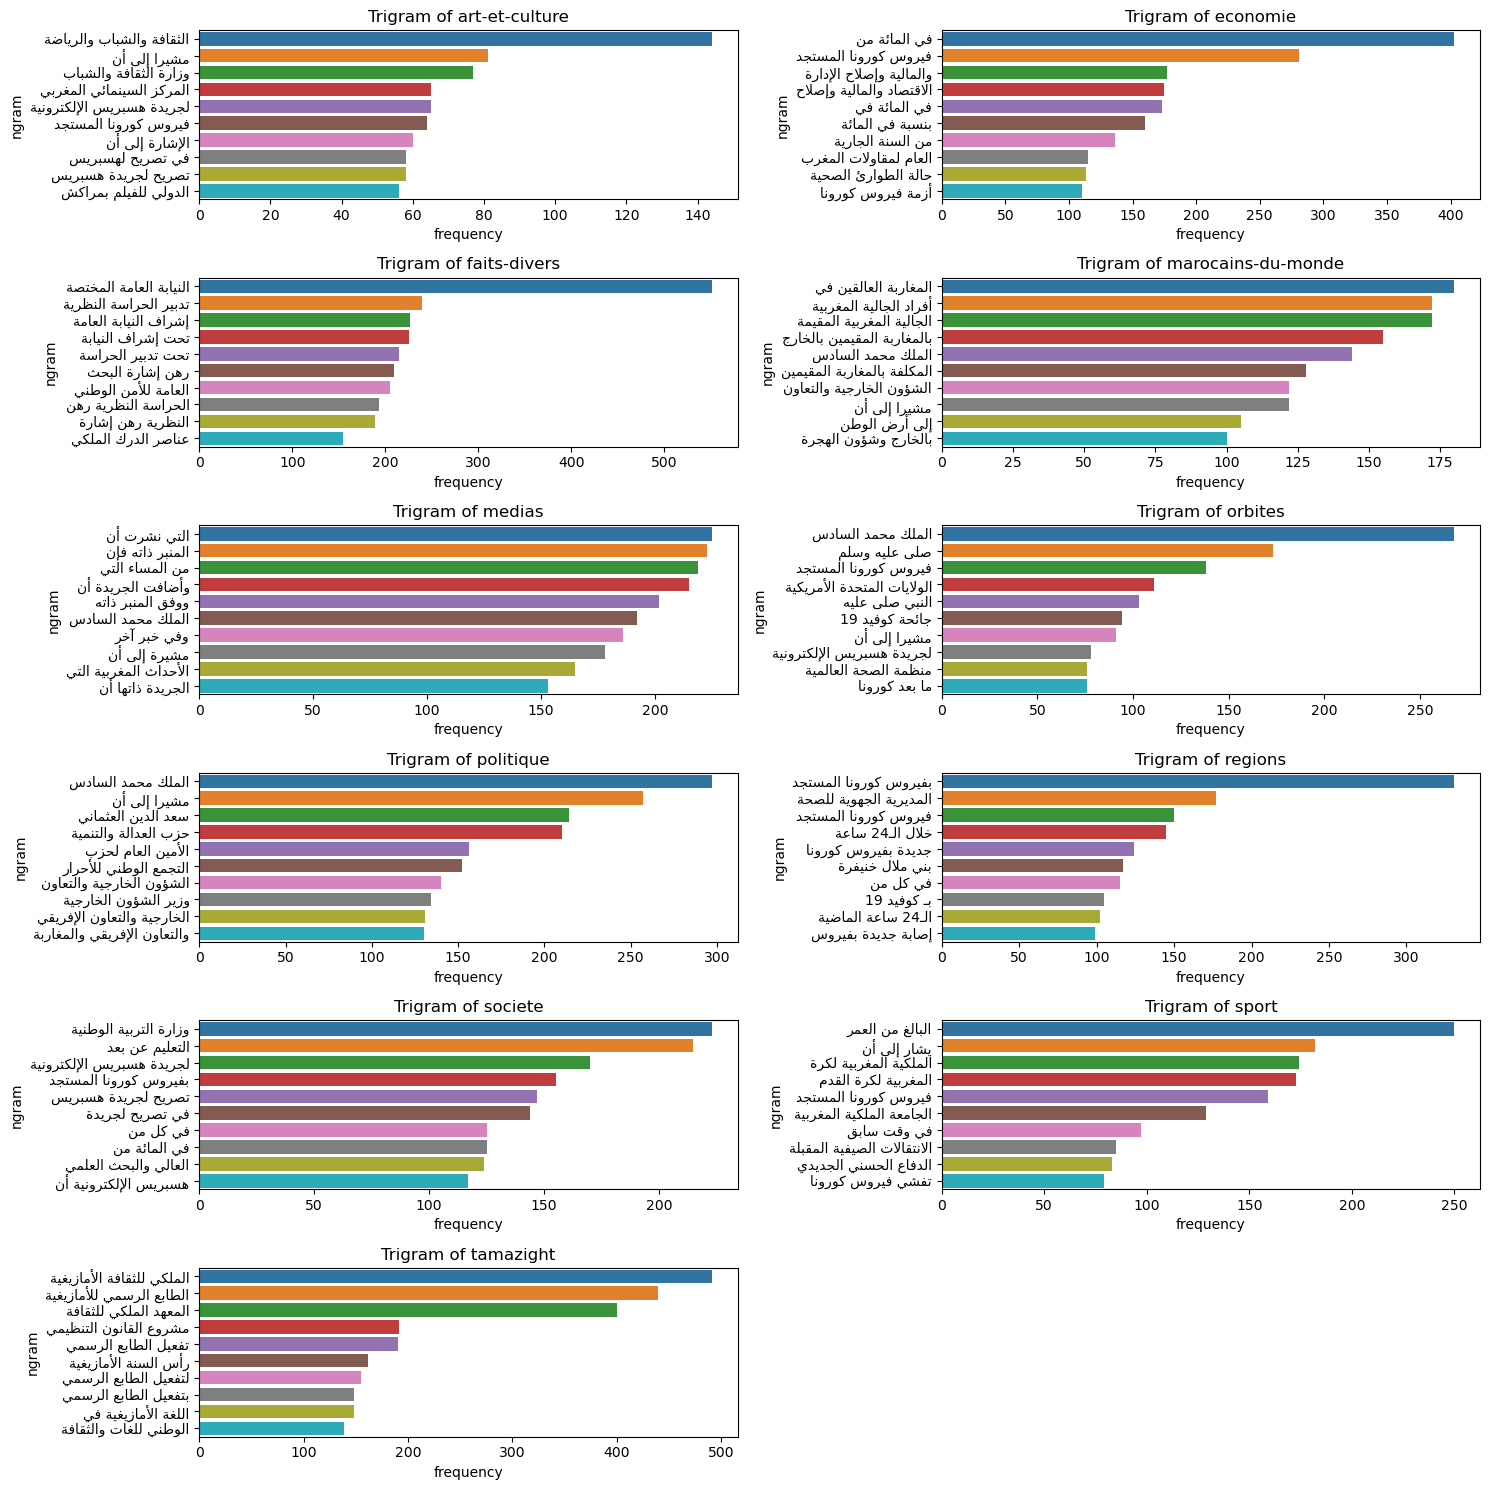

In [297]:
num_rows = 6
num_cols = 2

# Create the plot
plt.figure(figsize=(15, 15))
for (i,x) in enumerate(t):
    plt.subplot(num_rows, num_cols, i + 1)
    visualizeTrigram(x)
plt.tight_layout()
plt.show()

In [298]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,".""ﻪﺑ ﻥﻮﻣﻮﻘﺘﺳ ﺎﻣ ﺮﻈﺘﻨﻧ ﺎﻨﻧﺇﻭ ،ﺔﻴﻨﻏﻷﺍﻭ ﻰﻘﻴﺳﻮﻤﻟﺍ ...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,".""ﺎﻬﻋﻮﻧ ﻥﺎﻛ ﺎﻳﺃ ،ﺕﺎﻣﺯﻷﺍ ﺯﻭﺎﺠﺗ ﻲﻓ ﻪﻌﻗﻮﻣ ﻦﻣ ﺔﻤﻫﺎ...",art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,.ﺡﻼﺻﻹﺍ ﻖﺤﺘﺴﻳ ﺮﻣﻷﺍ ﻥﺃ ﺎﻘﺣ ﺪﻘﺘﻌﻧ ﺎﻨﻛ ﺍﺫﺇ ،ﺎﻨﻌﻤﺘﺠ...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,.ﻩﺪﻌﺑ ﺎﻣ ﻢﻫﻭ ﻝﺎﻴﺨﻣﻭ ،ﺱﻭﺮﻴﻔﻟﺍ ﻊﺋﺎﻗﻭ ﺔﻘﻴﻘﺣ ﻪﻤﻠﻘﺑ...,art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,.ﻞﻤﻌﻟﺍ ﻦﻋ ﻦﻴﻔﻗﻮﺘﻤﻟﺍ ﻲﻨﻔﻟﺍ ﻉﺎﻄﻘﻟﺎﺑ ﻦﻴﻠﻐﺘﺸﻤﻟﺍ ﺭﺮ...,art-et-culture


In [301]:
ndf.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [303]:
ndf['length']= ndf['story'].str.len()

In [304]:
def word_count(x):
    return len(x.split())

In [305]:
ndf['word_count']=ndf['story'].apply(word_count)

In [306]:
ndf.head()

,Unnamed: 0,id,title,date,author,story,topic,length,word_count
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200


In [315]:
features=['length','word_count']

                                                 For Class :  art-et-culture


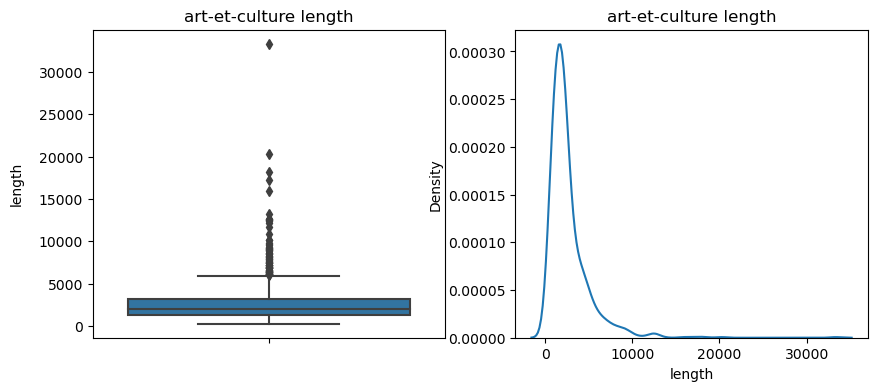

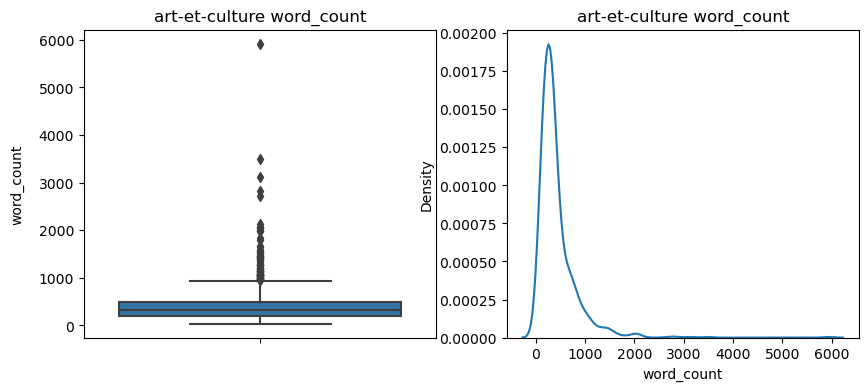

                                                 For Class :  economie


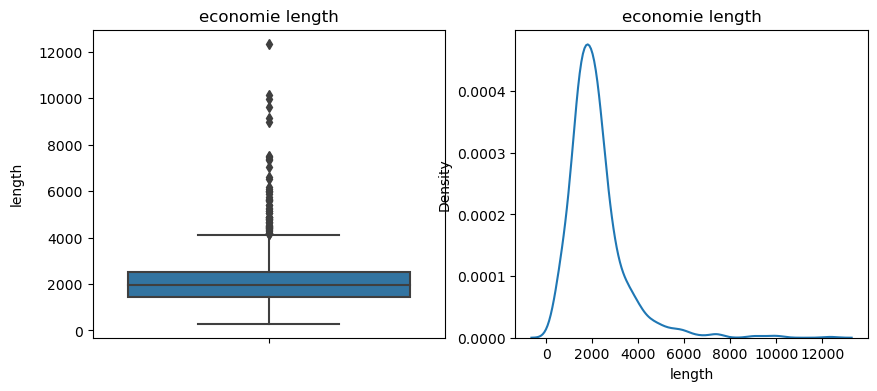

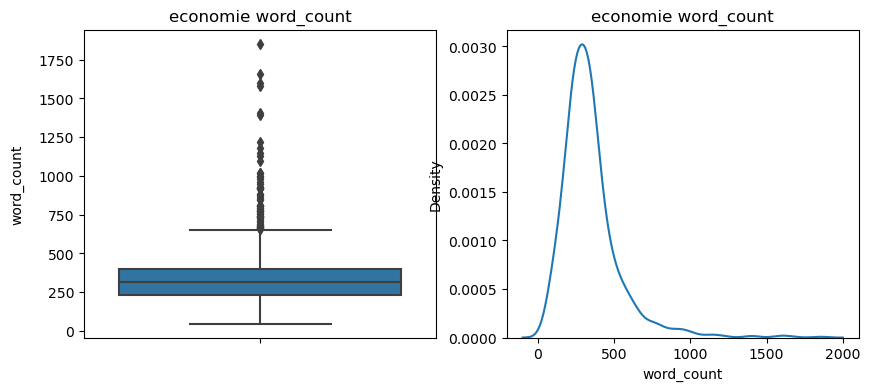

                                                 For Class :  faits-divers


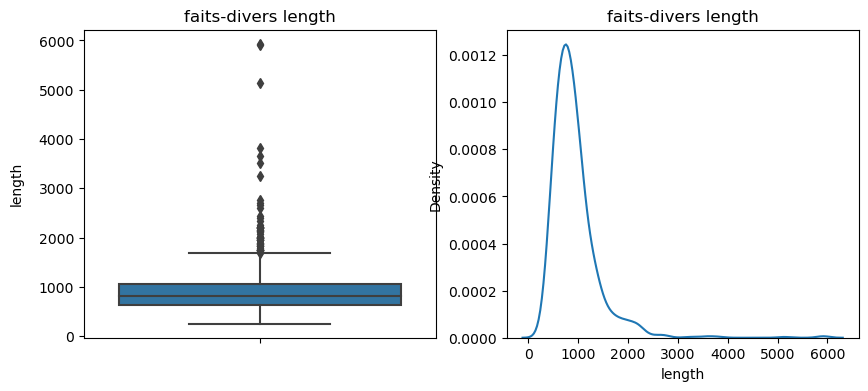

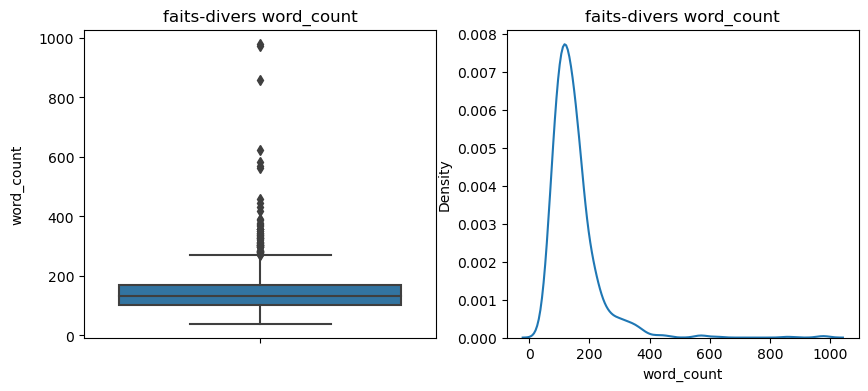

                                                 For Class :  marocains-du-monde


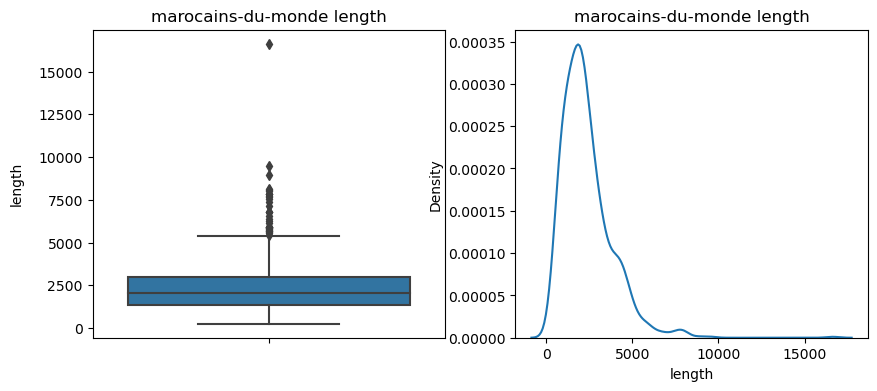

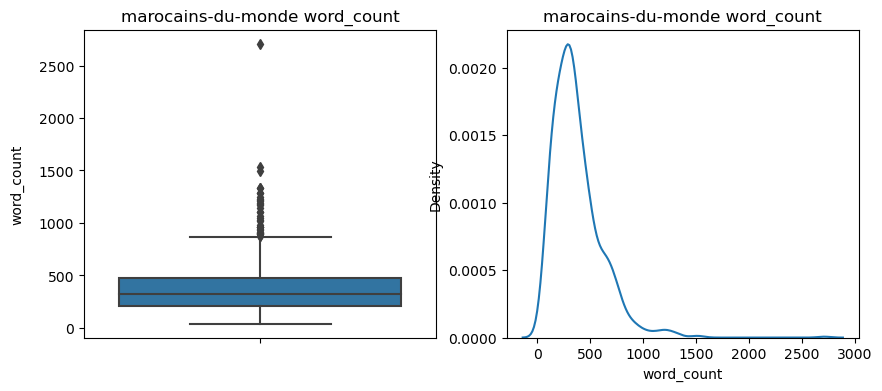

                                                 For Class :  medias


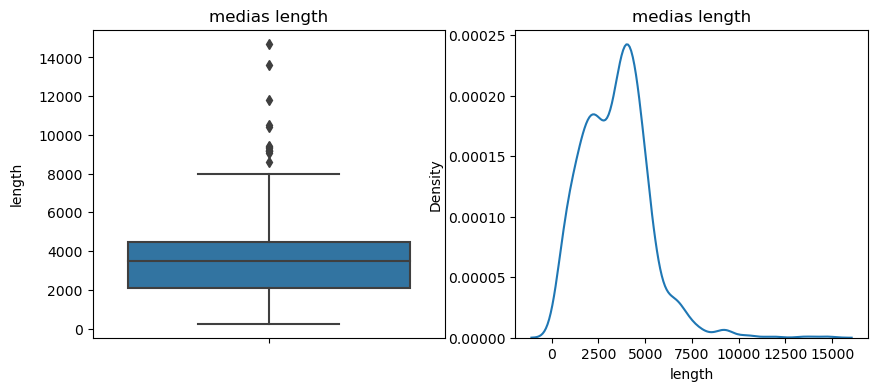

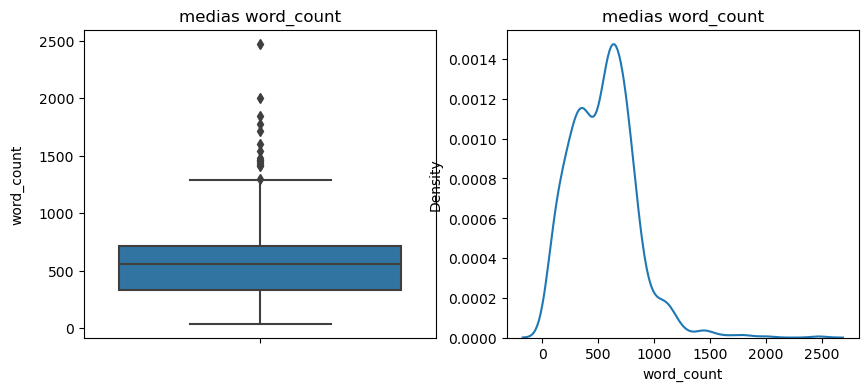

                                                 For Class :  orbites


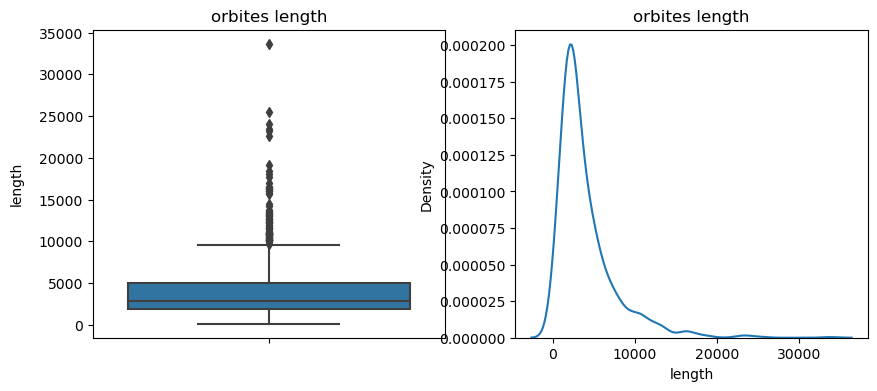

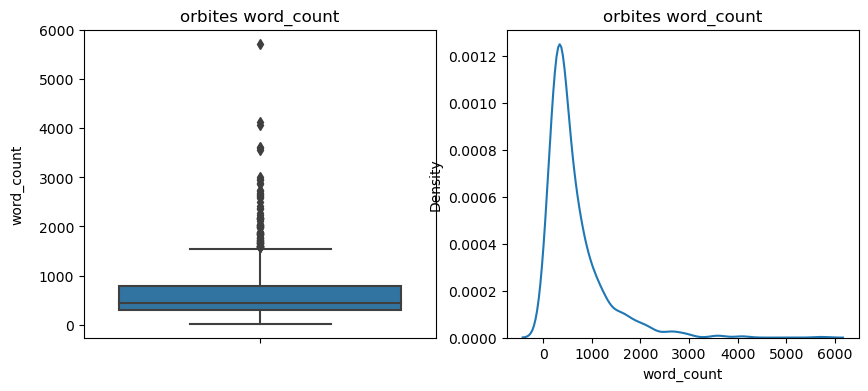

                                                 For Class :  politique


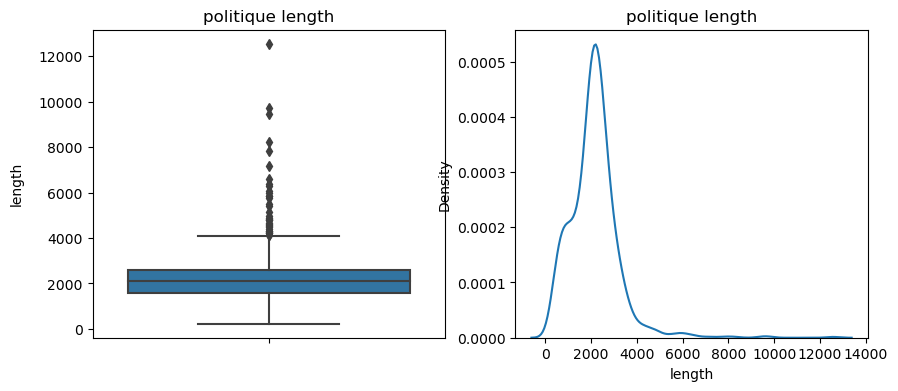

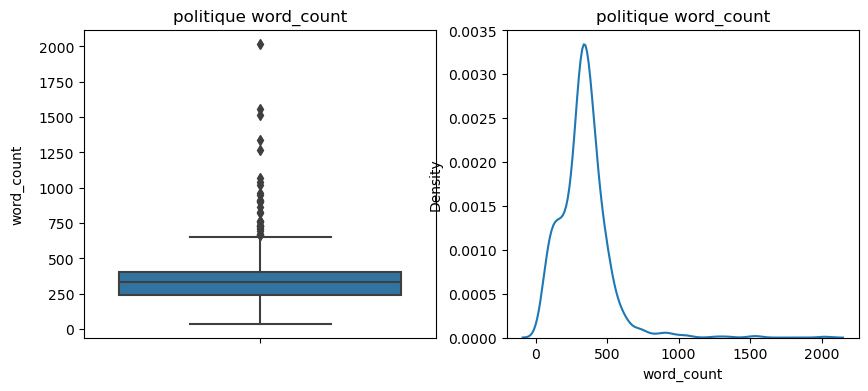

                                                 For Class :  regions


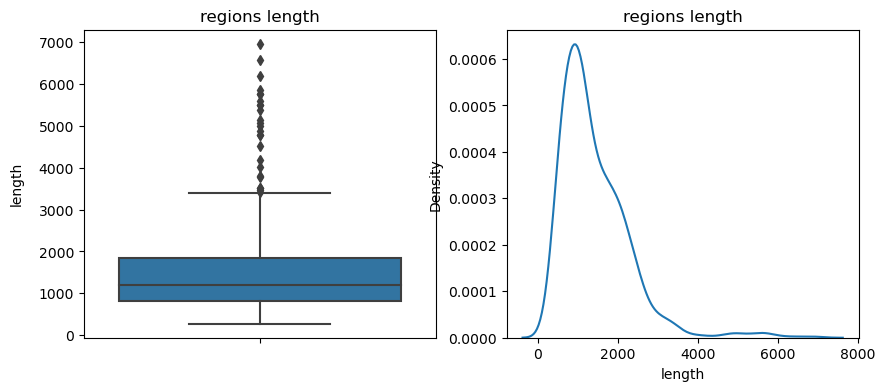

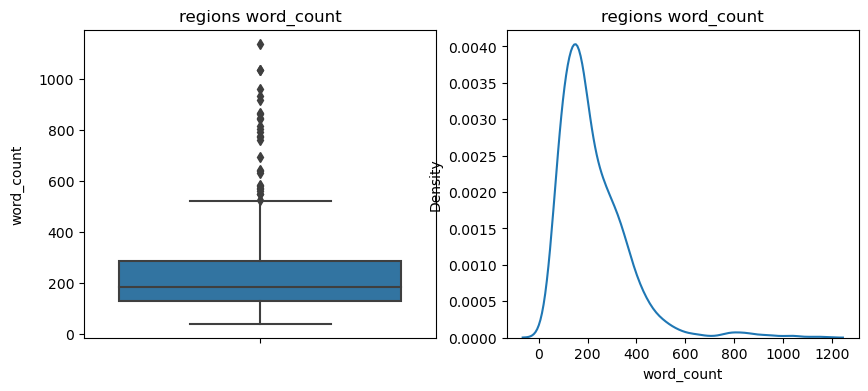

                                                 For Class :  societe


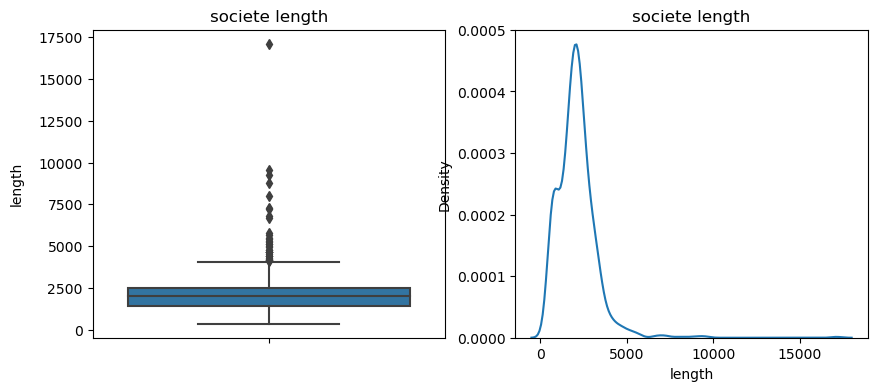

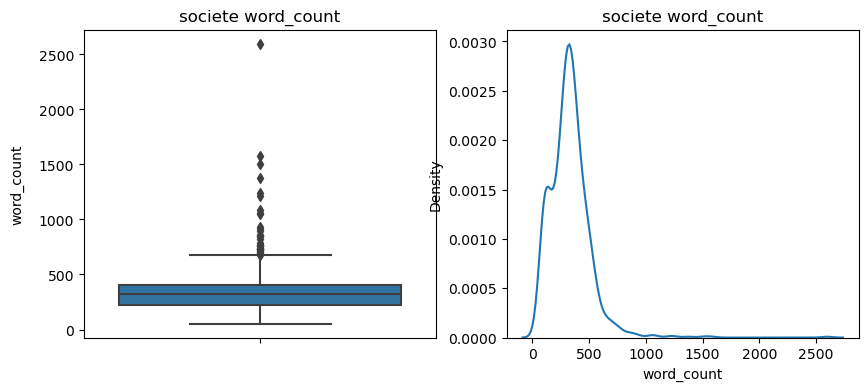

                                                 For Class :  sport


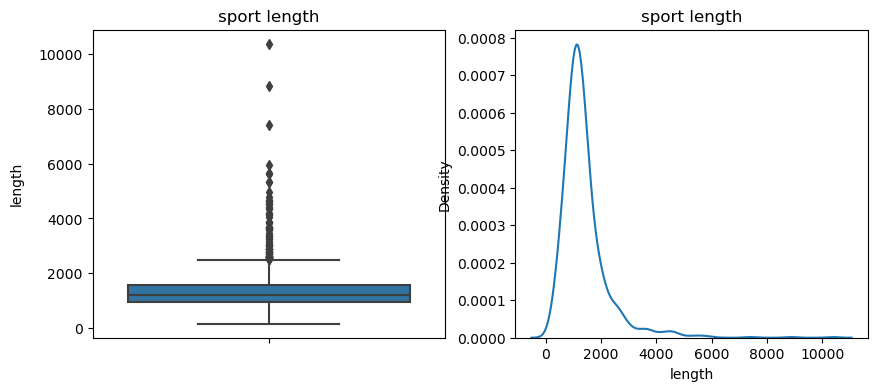

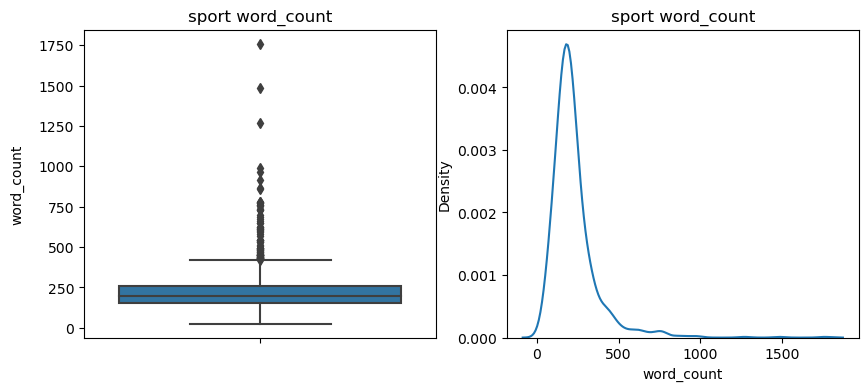

                                                 For Class :  tamazight


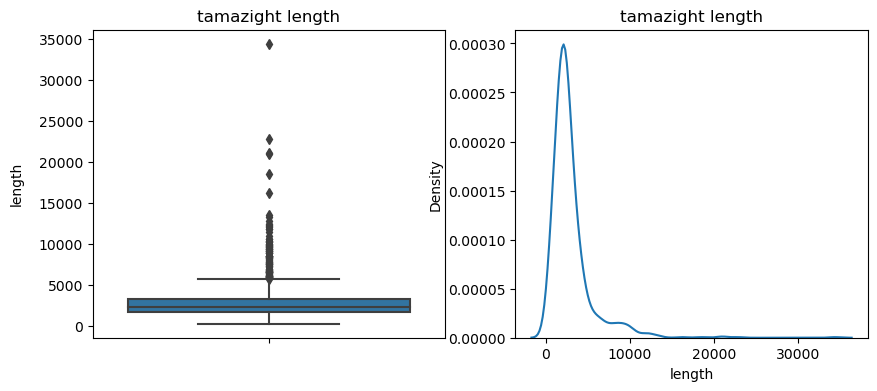

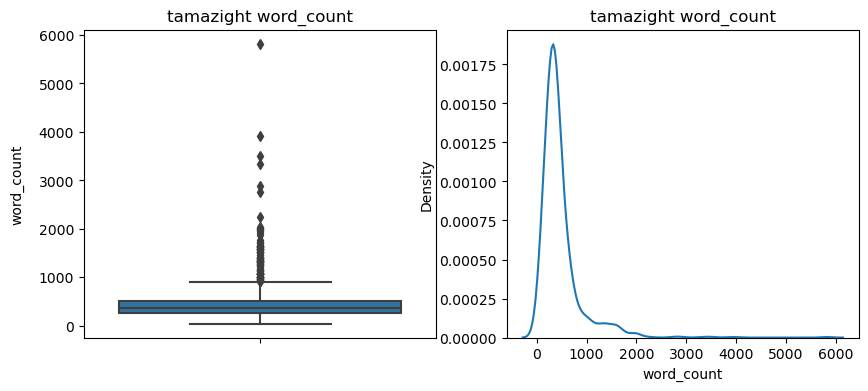

In [337]:
for j in t:
    print(f"                                                 For Class :  {j}")
    for i in features:
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,1)
        sns.boxplot(y=ndf[ndf['topic']==j][i])
        plt.title(j+" "+i)
        plt.ylabel(i,labelpad=10.5)
        plt.subplot(1,2,2)
        sns.kdeplot(x=ndf[ndf['topic']==j][i])
        plt.title(j+" "+i)
        plt.show()

<Axes: xlabel='length', ylabel='Density'>

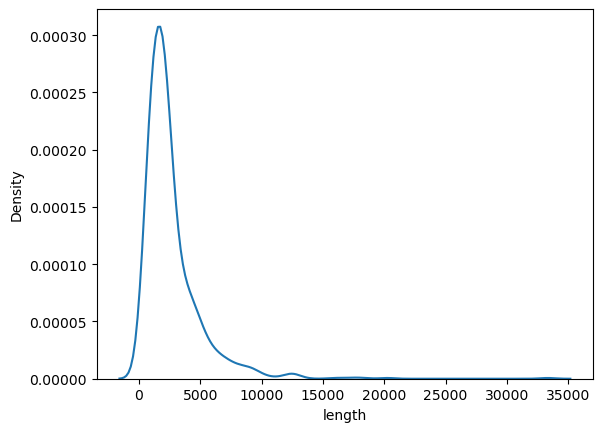

In [320]:
sns.kdeplot(ndf[ndf['topic']==t[0]]['length'])
